In [63]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Input 
from tensorflow.keras.utils import to_categorical

In [ ]:
model = Sequential()
model.add(Dense(100, activation="relu", input_shape=(32, 32, 1)))
model.add(Dense(50, activation="relu"))
model.add(Dense(100, activation="softmax"))
model.summary()

C:\Users\user\dev\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                     ┃ Output Shape            ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                    │ (None, 32, 32, 100)     │           200 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_1 (Dense)                  │ (None, 32, 32, 50)      │         5,050 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_2 (Dense)                  │ (None, 32, 32, 100)     │         5,100 │
└──────────────────────────────────┴─────────────────────────┴───────────────┘

 Total params: 10,350 (40.43 KB)

 Trainable params: 10,350 (40.43 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
input_layer = Input(shape=(32, 32, 1))
x = Dense(units=100, activation="relu")(input_layer)
x = Dense(units=50, activation="relu")(x)
output_layer = Dense(units=5, activation="softmax")(x)
model2 = Model(input_layer, output_layer)
model2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                     ┃ Output Shape            ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)       │ (None, 32, 32, 1)       │             0 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_3 (Dense)                  │ (None, 32, 32, 100)     │           200 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_4 (Dense)                  │ (None, 32, 32, 50)      │         5,050 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_5 (Dense)                  │ (None, 32, 32, 5)       │           255 │
└──────────────────────────────────┴─────────────────────────┴───────────────┘

 Total params: 5,505 (21.50 KB)

 Trainable params: 5,505 (21.50 KB)

 Non-trainable params: 0 (0.00 B)

분류 신경망 실습

In [41]:
np.random.seed(0)
tf.random.set_seed(0)

In [42]:
raw_wine = datasets.load_wine()
X = raw_wine.data
y = raw_wine.target

In [43]:
set(y)

{np.int64(0), np.int64(1), np.int64(2)}

In [44]:
y_hot = to_categorical(y)

In [45]:
X_tn, X_te, y_tn, y_te = train_test_split(X, y_hot, random_state=0)

In [46]:
X.shape

(178, 13)

In [47]:
n_feat = X_tn.shape[1]
n_class = len(set(y))
epochs = 30

In [48]:
model = Sequential()

In [49]:
model.add(Dense(20, input_dim=n_feat))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(n_class))
model.add(Activation("softmax"))

In [50]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                     ┃ Output Shape            ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                 │ (None, 20)              │           280 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ batch_normalization_2            │ (None, 20)              │            80 │
│ (BatchNormalization)             │                         │               │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ activation_4 (Activation)        │ (None, 20)              │             0 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_11 (Dense)                 │ (None, 3)               │            63 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ activation_5 (Activation)        │ (None, 3)               │             0 │
└──────────────────────────────────┴─────────────────────────┴───────────────┘

 Total params: 423 (1.65 KB)

 Trainable params: 383 (1.50 KB)

 Non-trainable params: 40 (160.00 B)

In [51]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [52]:
hist = model.fit(X_tn, y_tn, epochs=epochs, batch_size=5)

Epoch 1/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5038 - loss: 0.9912   
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5188 - loss: 0.8841 
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6090 - loss: 0.8211 
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6391 - loss: 0.7822 
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6391 - loss: 0.7548 
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6316 - loss: 0.7333 
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6466 - loss: 0.7142 
Epoch 8/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6617 - loss: 0.6959 
Epoch 9/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6917 - loss: 0.6748 
Epoch 10/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7368 - loss: 0.6589 
Epoch 11/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7820 - loss: 0.6423 
Epoch 12/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [57]:
model.evaluate(X_tn, y_tn)[1] # Accuracy

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9173 - loss: 0.2585 


0.9172932505607605

In [58]:
model.evaluate(X_te, y_te)[1]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9333 - loss: 0.1835


0.9333333373069763

In [59]:
epoch = np.arange(1, epochs + 1)
accuracy = hist.history["accuracy"]
loss = hist.history["loss"]

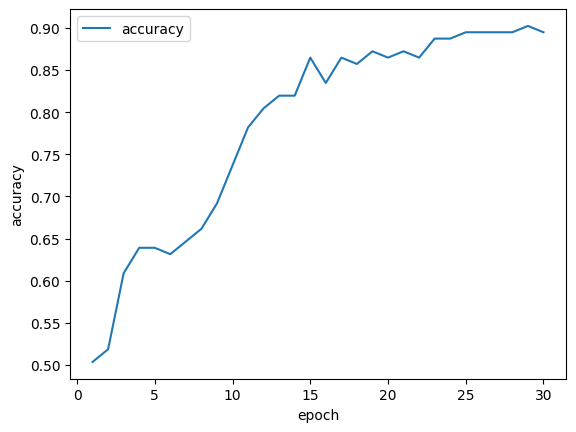

In [ ]:
plt.plot(epoch, accuracy, label="accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

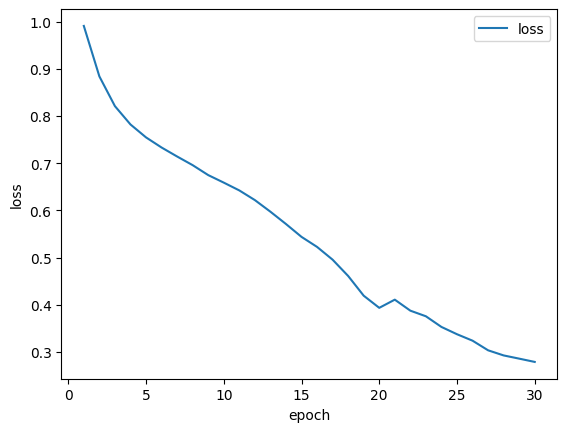

In [62]:
plt.plot(epoch, loss, label="loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

회귀 신경망 실습

In [64]:
DATA_URL = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(DATA_URL, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [65]:
X.shape

(506, 13)

In [66]:
set(y)

{np.float64(5.0),
 np.float64(5.6),
 np.float64(6.3),
 np.float64(7.0),
 np.float64(7.2),
 np.float64(7.4),
 np.float64(7.5),
 np.float64(8.1),
 np.float64(8.3),
 np.float64(8.4),
 np.float64(8.5),
 np.float64(8.7),
 np.float64(8.8),
 np.float64(9.5),
 np.float64(9.6),
 np.float64(9.7),
 np.float64(10.2),
 np.float64(10.4),
 np.float64(10.5),
 np.float64(10.8),
 np.float64(10.9),
 np.float64(11.0),
 np.float64(11.3),
 np.float64(11.5),
 np.float64(11.7),
 np.float64(11.8),
 np.float64(11.9),
 np.float64(12.0),
 np.float64(12.1),
 np.float64(12.3),
 np.float64(12.5),
 np.float64(12.6),
 np.float64(12.7),
 np.float64(12.8),
 np.float64(13.0),
 np.float64(13.1),
 np.float64(13.2),
 np.float64(13.3),
 np.float64(13.4),
 np.float64(13.5),
 np.float64(13.6),
 np.float64(13.8),
 np.float64(13.9),
 np.float64(14.0),
 np.float64(14.1),
 np.float64(14.2),
 np.float64(14.3),
 np.float64(14.4),
 np.float64(14.5),
 np.float64(14.6),
 np.float64(14.8),
 np.float64(14.9),
 np.float64(15.0),
 np.float

In [67]:
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=0)

In [68]:
n_feat = X_tn.shape[1]

In [69]:
model = Sequential()
model.add(Dense(20, input_dim=n_feat, activation="relu"))
model.add(Dense(1))

C:\Users\user\dev\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.compile(
    loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"]
)

In [71]:
hist = model.fit(X_tn, y_tn, epochs=epochs, batch_size=5)

Epoch 1/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1936.6754 - mean_squared_error: 1936.6754  
Epoch 2/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 283.6453 - mean_squared_error: 283.6453  
Epoch 3/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 129.7548 - mean_squared_error: 129.7548
Epoch 4/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 87.8707 - mean_squared_error: 87.8707  
Epoch 5/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70.1845 - mean_squared_error: 70.1845  
Epoch 6/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 63.5203 - mean_squared_error: 63.5203  
Epoch 7/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 59.1588 - mean_squared_error: 59.1588  
Epoch 8/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 55.6294 - mean_squared_error: 55.6294  
Epoch 9/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 52.5696 - mean_squared_error: 52.5696  
Epoch 10/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49.9499 - mean_squared_error: 49.9499  
Epoch 11/30
7

In [72]:
model.evaluate(X_tn, y_tn)[1] # MSE

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.1069 - mean_squared_error: 32.1069 


32.106895446777344

In [73]:
model.evaluate(X_te, y_te)[1]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.4197 - mean_squared_error: 41.4197 


41.4196662902832

In [76]:
epoch = np.arange(1, epochs + 1)
mse = hist.history["mean_squared_error"]
loss = hist.history["loss"]

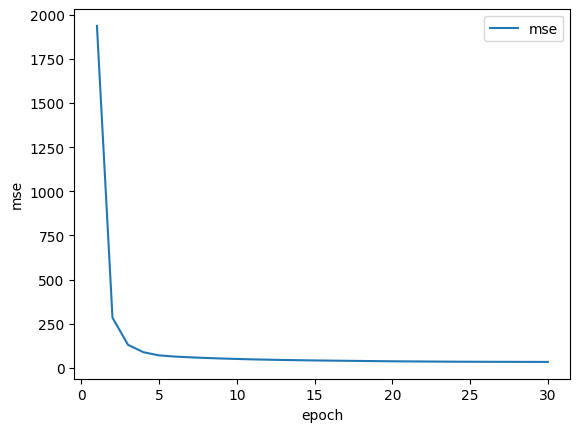

In [77]:
plt.plot(epoch, mse, label="mse")
plt.xlabel("epoch")
plt.ylabel("mse")
plt.legend()
plt.show()

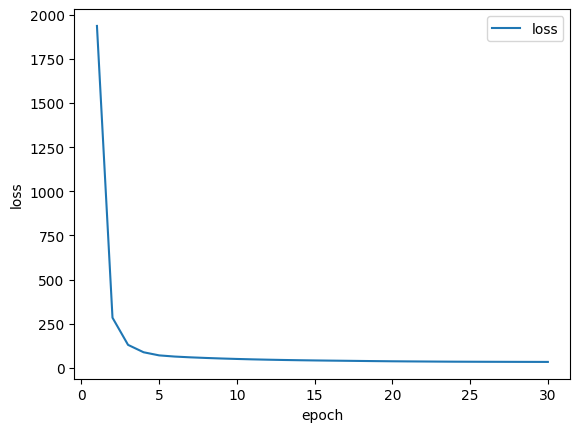

In [78]:
plt.plot(epoch, loss, label="loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [79]:
pred_y = model.predict(X_te).flatten()
pred_y

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([23.926134 , 24.516413 , 28.902037 , 16.249422 , 23.79873  ,
       23.257982 , 23.706823 , 28.999334 , 18.024271 , 11.720095 ,
       12.548349 , 15.562262 , 19.835558 , 10.1609745, 34.272083 ,
       29.289782 , 24.993292 , 32.993965 , 25.833063 , 24.459711 ,
       26.110094 , 22.278978 , 22.634245 , 30.740664 , 25.292547 ,
       20.771029 , 21.83706  , 11.579535 , 32.94724  , 21.372622 ,
       18.889353 , 22.265154 , 22.436815 , 24.956053 , 28.248354 ,
       21.182951 , 11.696947 , 24.551954 , 17.456602 , 16.507803 ,
       21.465189 , 22.117933 , 21.887274 , 17.704344 , 23.888662 ,
       30.044664 , 18.89873  , 18.731363 , 14.756563 , 26.267412 ,
       12.227339 , 20.708433 , 21.297777 , 30.04564  ,  9.916609 ,
       18.396616 , 22.254854 , 19.57258  , 18.295233 , 22.594294 ,
       25.912584 , 21.020067 , 30.828577 , 25.174025 , 21.030958 ,
       29.605646 , 19.194147 , 18.668741 , 20.4704   , 20.8285   ,
       23.142809 , 25.964815 , 32.335403 , 30.344095 , 27.0412

In [80]:
res_df = pd.DataFrame(pred_y, columns=["predict_val"])
res_df["real_val"] = y_te
res_df.head(3)

,predict_val,real_val
0,23.926134,22.6
1,24.516413,50.0
2,28.902037,23.0


In [81]:
df_sort = res_df.sort_values(["predict_val"], ascending=True)
df_sort.head(3)

,predict_val,real_val
96,4.028299,13.8
75,7.796732,7.4
116,8.530432,8.4


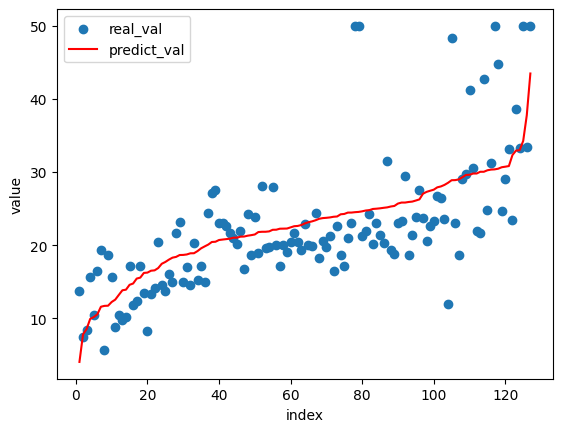

In [83]:
idx = np.arange(1, len(df_sort) + 1)
plt.scatter(idx, df_sort["real_val"], marker="o", label="real_val")
plt.plot(idx, df_sort["predict_val"], color="r", label="predict_val")
plt.xlabel("index")
plt.ylabel("value")
plt.legend()
plt.show()